# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
obj_df.shape

(205, 10)

# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [6]:
# check for missing values
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
# check for missing values
df.dropna().shape

(159, 26)

In [8]:
# drop rows where Age is missing
df[df.normalized_losses.notnull()].shape

(164, 26)

In [9]:
# mean Age
df.normalized_losses.mean()

122.0

In [10]:
# median Age
df.normalized_losses.median()

115.0

In [11]:
import numpy as np
# fill missing values for continuos variable.
df.normalized_losses.fillna(df.normalized_losses.median(), inplace=True)
df.bore.fillna(df.bore.median(), inplace=True)
df.stroke.fillna(df.stroke.median(), inplace=True)
df.horsepower.fillna(df.horsepower.median(), inplace=True)
df.peak_rpm.fillna(df.peak_rpm.median(), inplace=True)
df.price.fillna(df.price.median(), inplace=True)

# moda
df.num_doors.replace(np.nan,"four", inplace=True)


In [12]:
df.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [13]:
# check for missing values
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the number features

In [14]:
df_number = df.select_dtypes(include=['float64','int64']).copy()

In [15]:
df_number.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
y = df_number['price']
X = df_number.drop(['price'], axis=1)

In [17]:
X.shape, y.shape

((205, 15), (205,))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, train_size = 0.7, test_size = 0.3)

X_train.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
90,1,128.0,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,21.9,55.0,4800.0,45,50
184,2,94.0,97.3,171.7,65.5,55.7,2264,97,3.01,3.40,23.0,52.0,4800.0,37,46


In [19]:

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=6, n_jobs=-1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [20]:
from sklearn import metrics

base = metrics.mean_absolute_error( y_test , y_pred )
base

1669.4647849462367

* #### *max_depth* parameter

In [21]:
max_depth_p = [base]

for Max_depth in range(1, 50, 1):
    tree = RandomForestRegressor(max_depth = Max_depth,
                                  random_state=6, n_jobs=-1)
    
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    max_depth_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

In [22]:
import matplotlib.pyplot as plt


max_depth_p_df = pd.DataFrame(max_depth_p)
max_depth_p_df.rename(columns={0 : 'max_depth'}, inplace=True)

plt.plot(max_depth_p_df)
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

Text(0, 0.5, 'mean squared error')

In [23]:
if len(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()]) != 1:
    max_depth_choose = max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()][0]
else:
    if int(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()].index.values) != 0:
        max_depth_choose = int(max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()].index.values)
    else:
        max_depth_choose = 'auto'
        
max_depth_p_df.loc[max_depth_p_df.max_depth == max_depth_p_df["max_depth"].min()]

,max_depth
7,1568.317712


* #### *max_features* parameter

In [24]:
feature_cols = X_train.columns[X_train.columns.str.startswith('C') == False]
max_features_p = [base]

feature_range = range(1, len(feature_cols) + 1)

for Max_features in feature_range:
    tree = RandomForestRegressor(max_depth = max_depth_choose,
                                 max_features = Max_features,
                                 random_state=6, n_jobs=-1)
    
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    max_features_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

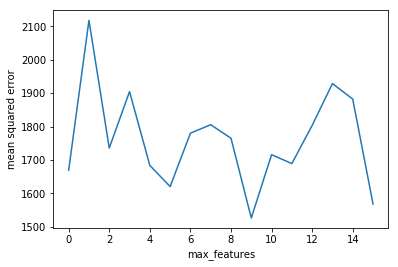

In [25]:
max_features_p_df = pd.DataFrame(max_features_p)
max_features_p_df.rename(columns = {0 : 'max_features'}, inplace=True)

plt.plot(max_features_p_df)
plt.xlabel('max_features')
plt.ylabel('mean squared error')

In [26]:
if len(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()]) != 1:
    max_features_choose = max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()][0]
else:
    if int(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()].index.values) != 0:
        max_features_choose = int(max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()].index.values)
    else:
        max_features_choose = 'auto'

max_features_p_df.loc[max_features_p_df.max_features == max_features_p_df["max_features"].min()]

,max_features
9,1526.458051


* #### *n_estimators* parameter

In [27]:
n_estimators_p = [base]

for N_estimator in range(1, 100, 1):
    tree = RandomForestRegressor(max_depth = max_depth_choose,
                                 max_features = max_features_choose,
                                 n_estimators = N_estimator,
                                 random_state=6, n_jobs=-1)
    
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    n_estimators_p.append( metrics.mean_absolute_error( y_test , y_pred )  )

*visual aid*

Text(0, 0.5, 'mean_squared_error')

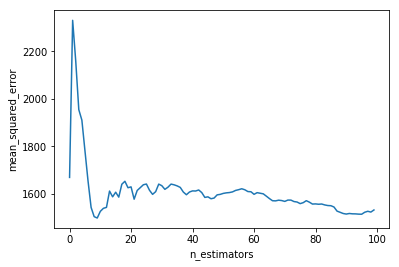

In [28]:
n_estimators_p_df = pd.DataFrame(n_estimators_p)
n_estimators_p_df.rename(columns = {0 : 'n_estimators'}, inplace=True)

plt.plot(n_estimators_p_df)
plt.xlabel('n_estimators')
plt.ylabel('mean_squared_error')

In [29]:
if len(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()]) != 1:
    n_estimators_choose = 'auto'
else:
    if int(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()].index.values) != 0:
        n_estimators_choose = 10 * int(n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()].index.values)
    else:
        n_estimators_choose = 'auto'

n_estimators_p_df.loc[n_estimators_p_df.n_estimators == n_estimators_p_df["n_estimators"].min()]

,n_estimators
9,1498.495931


In [30]:
tree= RandomForestRegressor(max_depth = max_depth_choose, 
                             max_features = max_features_choose,
                             n_estimators = n_estimators_choose,
                             oob_score = True,
                             random_state = 6, 
                             n_jobs=-1)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=-1, oob_score=True, random_state=6,
           verbose=0, warm_start=False)

In [31]:

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
    
metrics.mean_absolute_error( y_test , y_pred )

1515.1333350969885

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [32]:
y = df_number['price']
X = df_number.drop(['price'], axis=1)
X_ = df.select_dtypes(include=['object']).copy()

In [33]:
X_C = pd.get_dummies(X_)
X_C.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X_C.shape

(205, 60)

In [35]:
import pandas as pd

X_NC=pd.concat([X,X_C], axis=1,)

X_NC.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [36]:
X_NC.shape

(205, 75)

In [37]:
from sklearn.model_selection import train_test_split

X_NC_train, X_NC_test, y_NC_train, y_NC_test = train_test_split(X_NC, y,
                                                                random_state=6, train_size = 0.7, test_size = 0.3)

X_NC_train.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
90,1,128.0,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,...,0,0,0,0,0,1,0,0,0,0
184,2,94.0,97.3,171.7,65.5,55.7,2264,97,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [38]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

tree_NC = RandomForestRegressor(random_state=6, n_jobs=-1)
tree_NC.fit(X_NC_train, y_NC_train)
y_NC_pred = tree_NC.predict(X_NC_test)

In [39]:
from sklearn import metrics

base_NC = metrics.mean_absolute_error(y_NC_test , y_NC_pred )
base_NC

1562.2147849462365

* #### *max_depth* parameter

In [40]:
max_depth_p_NC = [base_NC]

for Max_depth_NC in range(1, 50, 1):
    tree_NC = RandomForestRegressor(max_depth = Max_depth_NC,
                                  random_state=6, n_jobs=-1)
    
    tree_NC.fit(X_NC_train, y_NC_train)
    y_NC_pred = tree_NC.predict(X_NC_test)
    
    max_depth_p_NC.append(metrics.mean_absolute_error( y_NC_test , y_NC_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

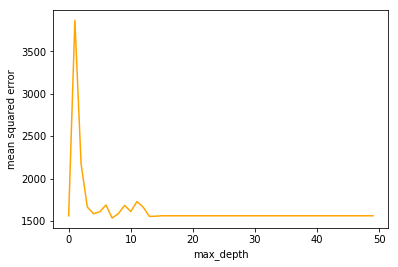

In [41]:
import matplotlib.pyplot as plt


max_depth_p_NC_df = pd.DataFrame( max_depth_p_NC)
max_depth_p_NC_df.rename(columns={0 : 'max_depth'}, inplace=True)

plt.plot(max_depth_p_NC_df, color="orange")
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

In [42]:
if len(max_depth_p_NC_df.loc[max_depth_p_NC_df.max_depth == max_depth_p_NC_df["max_depth"].min()]) != 1:
    max_depth_choose_NC = max_depth_p_NC_df.loc[max_depth_p_NC_df.max_depth == max_depth_p_NC_df["max_depth"].min()][0]
else:
    if int(max_depth_p_NC_df.loc[max_depth_p_NC_df.max_depth == max_depth_p_NC_df["max_depth"].min()].index.values) != 0:
        max_depth_choose_NC = int(max_depth_p_NC_df.loc[max_depth_p_NC_df.max_depth == max_depth_p_NC_df["max_depth"].min()].index.values)
    else:
        max_depth_choose_NC = 'auto'
        
max_depth_p_NC_df.loc[max_depth_p_NC_df.max_depth == max_depth_p_NC_df["max_depth"].min()]

,max_depth
7,1535.944888


* #### *max_features* parameter

In [43]:
feature_cols = X_NC_train.columns[X_NC_train.columns.str.startswith('C') == False]
max_features_p_NC = [base_NC]

feature_range = range(1, len(feature_cols) + 1)

for Max_features in feature_range:
    tree_NC = RandomForestRegressor(max_depth = max_depth_choose_NC,
                                 max_features = Max_features,
                                 random_state=6, n_jobs=-1)
    
    tree_NC.fit(X_NC_train, y_NC_train)
    y_NC_pred = tree_NC.predict(X_NC_test)
    
    max_features_p_NC.append( metrics.mean_absolute_error( y_NC_test , y_NC_pred )  )

Text(0, 0.5, 'mean squared error')

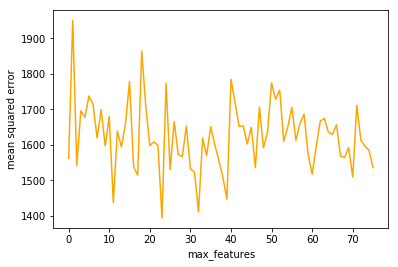

In [44]:
max_features_p_NC_df = pd.DataFrame(max_features_p_NC)
max_features_p_NC_df.rename(columns = {0 : 'max_features'}, inplace=True)

plt.plot(max_features_p_NC_df, color="orange")
plt.xlabel('max_features')
plt.ylabel('mean squared error')

In [45]:
if len(max_features_p_NC_df.loc[max_features_p_NC_df.max_features == max_features_p_NC_df["max_features"].min()]) != 1:
    max_features_choose_NC = max_features_p_NC_df.loc[max_features_p_NC_df.max_features == max_features_p_NC_df["max_features"].min()][0]
else:
    if int(max_features_p_NC_df.loc[max_features_p_NC_df.max_features == max_features_p_NC_df["max_features"].min()].index.values) != 0:
        max_features_choose_NC = int(max_features_p_NC_df.loc[max_features_p_NC_df.max_features == max_features_p_NC_df["max_features"].min()].index.values)
    else:
        max_features_choose_NC = 'auto'

max_features_p_NC_df.loc[max_features_p_NC_df.max_features == max_features_p_NC_df["max_features"].min()]

,max_features
23,1393.740962


* #### *n_estimators* parameter

In [46]:
n_estimators_p_NC = [base_NC]

for N_estimator in range(1, 100, 1):
    tree_NC = RandomForestRegressor(max_depth = max_depth_choose_NC,
                                 max_features = max_features_choose_NC,
                                 n_estimators = N_estimator,
                                 random_state=6, n_jobs=-1)
    
    tree_NC.fit(X_NC_train, y_NC_train)
    y_NC_pred = tree_NC.predict(X_NC_test)
    
    n_estimators_p_NC.append( metrics.mean_absolute_error( y_NC_test , y_NC_pred )  )

*visual aid*

Text(0, 0.5, 'mean_squared_error')

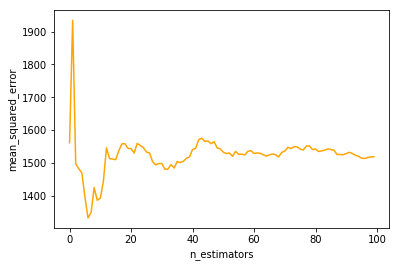

In [47]:
n_estimators_p_NC_df = pd.DataFrame(n_estimators_p_NC)
n_estimators_p_NC_df.rename(columns = {0 : 'n_estimators'}, inplace=True)

plt.plot(n_estimators_p_NC_df, color="orange")
plt.xlabel('n_estimators')
plt.ylabel('mean_squared_error')

In [48]:
if len(n_estimators_p_NC_df.loc[n_estimators_p_NC_df.n_estimators == n_estimators_p_NC_df["n_estimators"].min()]) != 1:
    n_estimators_choose_NC = 'auto'
else:
    if int(n_estimators_p_NC_df.loc[n_estimators_p_NC_df.n_estimators == n_estimators_p_NC_df["n_estimators"].min()].index.values) != 0:
        n_estimators_choose_NC = 10 * int(n_estimators_p_NC_df.loc[n_estimators_p_NC_df.n_estimators == n_estimators_p_NC_df["n_estimators"].min()].index.values)
    else:
        n_estimators_choose_NC = 'auto'

n_estimators_p_NC_df.loc[n_estimators_p_NC_df.n_estimators == n_estimators_p_NC_df["n_estimators"].min()]

,n_estimators
6,1333.212821


In [49]:
tree_NC= RandomForestRegressor(max_depth = max_depth_choose_NC, 
                             max_features = max_features_choose_NC,
                             n_estimators = n_estimators_choose_NC,
                             oob_score = True,
                             random_state = 6, 
                             n_jobs=-1)
tree_NC.fit(X_NC_train, y_NC_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=23, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=-1, oob_score=True, random_state=6,
           verbose=0, warm_start=False)

In [50]:
tree_NC.fit(X_NC_train, y_NC_train)
y_NC_pred = tree_NC.predict(X_NC_test)
    
metrics.mean_absolute_error( y_NC_test , y_NC_pred )

1529.2558804348516

In [51]:
print("Mean absolute error for continuous variables",round(metrics.mean_absolute_error( y_test , y_pred ),2))
print("Mean absolute error for continuous variables and categorical",
      round(metrics.mean_absolute_error( y_NC_test , y_NC_pred ),2))

Mean absolute error for continuous variables 1515.13
Mean absolute error for continuous variables and categorical 1529.26


how to view in this part, when introducte the dummis variables is more better than element continuos variables.

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [52]:
import category_encoders as ce

## Binary

Binary encoding for categorical variables, similar to onehot, but stores categories as binary bitstrings.

In [53]:
X_ = df.select_dtypes(include=['object']).copy()

encoder=ce.BinaryEncoder()
encoder.fit(X_)
X_Bin=encoder.transform(X_)


In [54]:
X_Bin.head(2)

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
0,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [55]:
X_Bin.shape

(205, 33)

In [56]:
import pandas as pd

X_Binary=pd.concat([X,X_Bin], axis=1,)

y = df_number['price']

X_Binary.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,1
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,1
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,1,0,0,0,0,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,0,1,0,0,0,1
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,1,1,0,0,0,1


In [57]:
from sklearn.model_selection import train_test_split

X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_Binary, y,
                                                                random_state=6, train_size = 0.7, test_size = 0.3)

X_B_train.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
90,1,128.0,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,...,1,1,0,0,0,1,0,1,1,1
184,2,94.0,97.3,171.7,65.5,55.7,2264,97,3.01,3.40,...,1,1,0,0,0,1,0,1,1,1


In [58]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

tree_B = RandomForestRegressor(random_state=6, n_jobs=-1)
tree_B.fit(X_B_train, y_B_train)
y_B_pred = tree_B.predict(X_B_test)

In [59]:
from sklearn import metrics

base_B = metrics.mean_absolute_error(y_B_test , y_B_pred )
base_B

1714.0440860215056

* #### *max_depth* parameter

In [60]:
max_depth_p_B = [base_B]

for Max_depth_B in range(1, 50, 1):
    tree_B = RandomForestRegressor(max_depth = Max_depth_B,
                                  random_state=6, n_jobs=-1)
    
    tree_B.fit(X_B_train, y_B_train)
    y_B_pred = tree_B.predict(X_B_test)
    
    max_depth_p_B.append(metrics.mean_absolute_error( y_B_test , y_B_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

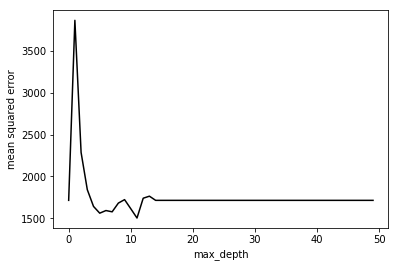

In [61]:
import matplotlib.pyplot as plt


max_depth_p_B_df = pd.DataFrame( max_depth_p_B)
max_depth_p_B_df.rename(columns={0 : 'max_depth'}, inplace=True)

plt.plot(max_depth_p_B_df, color="black")
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

In [62]:
if len(max_depth_p_B_df.loc[max_depth_p_B_df.max_depth == max_depth_p_B_df["max_depth"].min()]) != 1:
    max_depth_choose_B = max_depth_p_B_df.loc[max_depth_p_B_df.max_depth == max_depth_p_B_df["max_depth"].min()][0]
else:
    if int(max_depth_p_B_df.loc[max_depth_p_B_df.max_depth == max_depth_p_B_df["max_depth"].min()].index.values) != 0:
        max_depth_choose_B = int(max_depth_p_B_df.loc[max_depth_p_B_df.max_depth == max_depth_p_B_df["max_depth"].min()].index.values)
    else:
        max_depth_choose_B = 'auto'
        
max_depth_p_B_df.loc[max_depth_p_B_df.max_depth == max_depth_p_B_df["max_depth"].min()]

,max_depth
11,1503.117177


* #### *max_features* parameter

In [63]:
feature_cols = X_B_train.columns[X_B_train.columns.str.startswith('C') == False]
max_features_p_B = [base_B]

feature_range = range(1, len(feature_cols) + 1)

for Max_features in feature_range:
    tree_B = RandomForestRegressor(max_depth = max_depth_choose_B,
                                 max_features = Max_features,
                                 random_state=6, n_jobs=-1)
    
    tree_B.fit(X_B_train, y_B_train)
    y_B_pred = tree_B.predict(X_B_test)
    
    max_features_p_B.append( metrics.mean_absolute_error( y_B_test , y_B_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

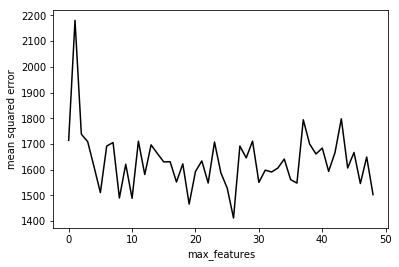

In [64]:
max_features_p_B_df = pd.DataFrame(max_features_p_B)
max_features_p_B_df.rename(columns = {0 : 'max_features'}, inplace=True)

plt.plot(max_features_p_B_df, color="black")
plt.xlabel('max_features')
plt.ylabel('mean squared error')

In [65]:
if len(max_features_p_B_df.loc[max_features_p_B_df.max_features == max_features_p_B_df["max_features"].min()]) != 1:
    max_features_choose_B = max_features_p_B_df.loc[max_features_p_B_df.max_features == max_features_p_B_df["max_features"].min()][0]
else:
    if int(max_features_p_B_df.loc[max_features_p_B_df.max_features == max_features_p_B_df["max_features"].min()].index.values) != 0:
        max_features_choose_B = int(max_features_p_B_df.loc[max_features_p_B_df.max_features == max_features_p_B_df["max_features"].min()].index.values)
    else:
        max_features_choose_B = 'auto'

max_features_p_B_df.loc[max_features_p_B_df.max_features == max_features_p_B_df["max_features"].min()]

,max_features
26,1412.180971


* #### *n_estimators* parameter

In [66]:
n_estimators_p_B = [base_B]

for N_estimator in range(1, 100, 1):
    tree_B = RandomForestRegressor(max_depth = max_depth_choose_B,
                                 max_features = max_features_choose_B,
                                 n_estimators = N_estimator,
                                 random_state=6, n_jobs=-1)
    
    tree_B.fit(X_B_train, y_B_train)
    y_B_pred = tree_B.predict(X_B_test)
    
    n_estimators_p_B.append( metrics.mean_absolute_error( y_B_test , y_B_pred )  )

*visual aid*

Text(0, 0.5, 'mean_squared_error')

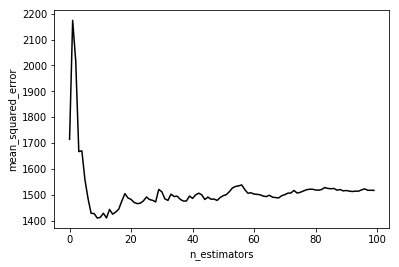

In [67]:
n_estimators_p_B_df = pd.DataFrame(n_estimators_p_B)
n_estimators_p_B_df.rename(columns = {0 : 'n_estimators'}, inplace=True)

plt.plot(n_estimators_p_B_df, color="black")
plt.xlabel('n_estimators')
plt.ylabel('mean_squared_error')

In [68]:
if len(n_estimators_p_B_df.loc[n_estimators_p_B_df.n_estimators == n_estimators_p_B_df["n_estimators"].min()]) != 1:
    n_estimators_choose_B = 'auto'
else:
    if int(n_estimators_p_B_df.loc[n_estimators_p_B_df.n_estimators == n_estimators_p_B_df["n_estimators"].min()].index.values) != 0:
        n_estimators_choose_B = 10 * int(n_estimators_p_B_df.loc[n_estimators_p_B_df.n_estimators == n_estimators_p_B_df["n_estimators"].min()].index.values)
    else:
        n_estimators_choose_B = 'auto'

n_estimators_p_B_df.loc[n_estimators_p_B_df.n_estimators == n_estimators_p_B_df["n_estimators"].min()]

,n_estimators
9,1409.785308


In [69]:
tree_B= RandomForestRegressor(max_depth = max_depth_choose_B, 
                             max_features = max_features_choose_B,
                             n_estimators = n_estimators_choose_B,
                             oob_score = True,
                             random_state = 6, 
                             n_jobs=-1)
tree_B.fit(X_B_train, y_B_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features=26, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=-1, oob_score=True, random_state=6,
           verbose=0, warm_start=False)

In [70]:
tree_B.fit(X_B_train, y_B_train)
y_B_pred = tree_B.predict(X_B_test)
    
metrics.mean_absolute_error( y_B_test , y_B_pred )

1516.1590512154935

## Feature Hashing

Feature Hashing for Large Scale Multitask Learning

https://alex.smola.org/papers/2009/Weinbergeretal09.pdf

``Empirical evidence suggests that hashing is an effective strategy for dimensionality reduction and practical nonparametric estimation. In this paper we provide exponential tail bounds for feature hashing and show that the interaction between random subspaces is negligible with high probability. We demonstrate the feasibility of this approach with experimental results for a new use case — multitask learning with hundreds of thousands of tasks.``

In [71]:
X_ = df.select_dtypes(include=['object']).copy()

X_Feature_hashing = ce.HashingEncoder(n_components=8).fit_transform(X_)


In [72]:
X_Feature_hashing.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,1,1,1,2,1,2,2,0
1,1,1,1,2,1,2,2,0
2,1,1,0,1,2,2,2,1
3,3,0,2,0,2,1,1,1
4,3,0,1,0,1,2,2,1


In [73]:
X_Feature_hashing.shape

(205, 8)

In [74]:
import pandas as pd

X_FH=pd.concat([X,X_Feature_hashing], axis=1,)

y = df_number['price']

X_FH.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,city_mpg,highway_mpg,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,21,27,1,1,1,2,1,2,2,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,21,27,1,1,1,2,1,2,2,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,19,26,1,1,0,1,2,2,2,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,24,30,3,0,2,0,2,1,1,1
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,18,22,3,0,1,0,1,2,2,1


In [75]:
X_FH.shape

(205, 23)

In [76]:
from sklearn.model_selection import train_test_split

X_FH_train, X_FH_test, y_FH_train, y_FH_test = train_test_split(X_FH, y,
                                                                random_state=6, train_size = 0.7, test_size = 0.3)

X_FH_train.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,city_mpg,highway_mpg,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
90,1,128.0,94.5,165.3,63.8,54.5,2017,103,2.99,3.47,...,45,50,1,1,3,0,2,1,1,1
184,2,94.0,97.3,171.7,65.5,55.7,2264,97,3.01,3.40,...,37,46,1,0,3,0,2,1,1,2


In [77]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

tree_FH = RandomForestRegressor(random_state=6, n_jobs=-1)
tree_FH.fit(X_FH_train, y_FH_train)
y_FH_pred = tree_FH.predict(X_FH_test)

In [78]:
from sklearn import metrics

base_FH = metrics.mean_absolute_error(y_FH_test , y_FH_pred )
base_FH

1624.013440860215

* #### *max_depth* parameter

In [79]:
max_depth_p_FH = [base_FH]

for Max_depth_FH in range(1, 50, 1):
    tree_FH = RandomForestRegressor(max_depth = Max_depth_FH,
                                  random_state=6, n_jobs=-1)
    
    tree_FH.fit(X_FH_train, y_FH_train)
    y_FH_pred = tree_FH.predict(X_FH_test)
    
    max_depth_p_FH.append(metrics.mean_absolute_error( y_FH_test , y_FH_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

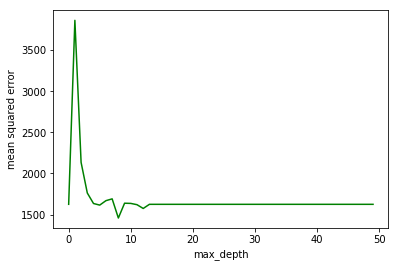

In [80]:
import matplotlib.pyplot as plt


max_depth_p_FH_df = pd.DataFrame( max_depth_p_FH)
max_depth_p_FH_df.rename(columns={0 : 'max_depth'}, inplace=True)

plt.plot(max_depth_p_FH_df, color="green")
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

In [81]:
if len(max_depth_p_FH_df.loc[max_depth_p_FH_df.max_depth == max_depth_p_FH_df["max_depth"].min()]) != 1:
    max_depth_choose_FH = max_depth_p_FH_df.loc[max_depth_p_FH_df.max_depth == max_depth_p_FH_df["max_depth"].min()][0]
else:
    if int(max_depth_p_FH_df.loc[max_depth_p_FH_df.max_depth == max_depth_p_FH_df["max_depth"].min()].index.values) != 0:
        max_depth_choose_FH = int(max_depth_p_FH_df.loc[max_depth_p_FH_df.max_depth == max_depth_p_FH_df["max_depth"].min()].index.values)
    else:
        max_depth_choose_FH = 'auto'
        
max_depth_p_FH_df.loc[max_depth_p_FH_df.max_depth == max_depth_p_FH_df["max_depth"].min()]

,max_depth
8,1457.387546


* #### *max_features* parameter

In [82]:
feature_cols = X_FH_train.columns[X_FH_train.columns.str.startswith('C') == False]
max_features_p_FH = [base_FH]

feature_range = range(1, len(feature_cols) + 1)

for Max_features in feature_range:
    tree_FH = RandomForestRegressor(max_depth = max_depth_choose_FH,
                                 max_features = Max_features,
                                 random_state=6, n_jobs=-1)
    
    tree_FH.fit(X_FH_train, y_FH_train)
    y_FH_pred = tree_FH.predict(X_FH_test)
    
    max_features_p_FH.append( metrics.mean_absolute_error( y_FH_test , y_FH_pred )  )

*visual aid*

Text(0, 0.5, 'mean squared error')

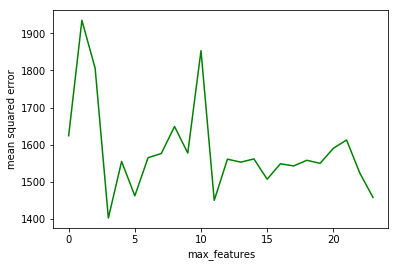

In [83]:
max_features_p_FH_df = pd.DataFrame(max_features_p_FH)
max_features_p_FH_df.rename(columns = {0 : 'max_features'}, inplace=True)

plt.plot(max_features_p_FH_df, color="green")
plt.xlabel('max_features')
plt.ylabel('mean squared error')

In [84]:
if len(max_features_p_FH_df.loc[max_features_p_FH_df.max_features == max_features_p_FH_df["max_features"].min()]) != 1:
    max_features_choose_FH = max_features_p_FH_df.loc[max_features_p_FH_df.max_features == max_features_p_FH_df["max_features"].min()][0]
else:
    if int(max_features_p_FH_df.loc[max_features_p_FH_df.max_features == max_features_p_FH_df["max_features"].min()].index.values) != 0:
        max_features_choose_FH = int(max_features_p_FH_df.loc[max_features_p_FH_df.max_features == max_features_p_FH_df["max_features"].min()].index.values)
    else:
        max_features_choose_FH = 'auto'

max_features_p_FH_df.loc[max_features_p_FH_df.max_features == max_features_p_FH_df["max_features"].min()]

,max_features
3,1402.101931


* #### *n_estimators* parameter

In [85]:
n_estimators_p_FH = [base_FH]

for N_estimator in range(1, 100, 1):
    tree_FH = RandomForestRegressor(max_depth = max_depth_choose_FH,
                                 max_features = max_features_choose_FH,
                                 n_estimators = N_estimator,
                                 random_state=6, n_jobs=-1)
    
    tree_FH.fit(X_FH_train, y_FH_train)
    y_FH_pred = tree_FH.predict(X_FH_test)
    
    n_estimators_p_FH.append( metrics.mean_absolute_error( y_FH_test , y_FH_pred )  )

*visual aid*

Text(0, 0.5, 'mean_squared_error')

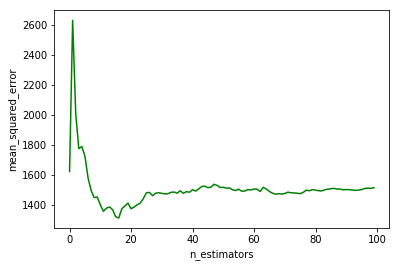

In [86]:
n_estimators_p_FH_df = pd.DataFrame(n_estimators_p_FH)
n_estimators_p_FH_df.rename(columns = {0 : 'n_estimators'}, inplace=True)

plt.plot(n_estimators_p_FH_df, color="green")
plt.xlabel('n_estimators')
plt.ylabel('mean_squared_error')

In [87]:
if len(n_estimators_p_FH_df.loc[n_estimators_p_FH_df.n_estimators == n_estimators_p_FH_df["n_estimators"].min()]) != 1:
    n_estimators_choose_FH = 'auto'
else:
    if int(n_estimators_p_FH_df.loc[n_estimators_p_FH_df.n_estimators == n_estimators_p_FH_df["n_estimators"].min()].index.values) != 0:
        n_estimators_choose_FH = 10 * int(n_estimators_p_FH_df.loc[n_estimators_p_FH_df.n_estimators == n_estimators_p_FH_df["n_estimators"].min()].index.values)
    else:
        n_estimators_choose_FH = 'auto'

n_estimators_p_FH_df.loc[n_estimators_p_FH_df.n_estimators == n_estimators_p_FH_df["n_estimators"].min()]

,n_estimators
16,1314.763854


In [88]:
tree_FH= RandomForestRegressor(max_depth = max_depth_choose_FH, 
                             max_features = max_features_choose_FH,
                             n_estimators = n_estimators_choose_FH,
                             oob_score = True,
                             random_state = 6, 
                             n_jobs=-1)
tree_FH.fit(X_FH_train, y_FH_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=-1, oob_score=True, random_state=6,
           verbose=0, warm_start=False)

In [89]:
tree_FH.fit(X_FH_train, y_FH_train)
y_FH_pred = tree_FH.predict(X_FH_test)
    
metrics.mean_absolute_error( y_FH_test , y_FH_pred )

1508.1351899455142

In [90]:
print("Mean absolute error")
print("\n")

print("continuous variables",round(metrics.mean_absolute_error( y_test , y_pred ),2))
print("continuous variables and categorical transformation with Dummy",
      round(metrics.mean_absolute_error( y_NC_test , y_NC_pred ),2))
print("continuous variable and categorical transformation with Binary ",
     round(metrics.mean_absolute_error(y_B_test, y_B_pred),2))

print("continuos variable and categorical transformation with Feature Hashing",
     round(metrics.mean_absolute_error(y_FH_test, y_FH_pred),2))

Mean absolute error


continuous variables 1515.13
continuous variables and categorical transformation with Dummy 1529.26
continuous variable and categorical transformation with Binary  1516.16
continuos variable and categorical transformation with Feature Hashing 1508.14


*Result summary*

In [91]:
Binary = []

for ran in range(1, 100, 1):
    tree_B = RandomForestRegressor(max_depth = max_depth_choose_B,
                                 max_features = max_features_choose_B,
                                 n_estimators = n_estimators_choose_B,
                                 oob_score = True,
                                 random_state = ran, 
                                 n_jobs=-1)
    
    tree_B.fit(X_B_train, y_B_train)
    y_B_pred=tree_B.predict(X_B_test)
    Binary.append(metrics.mean_absolute_error(y_B_test, y_B_pred))

In [92]:
import numpy as np

Binary_df = pd.DataFrame(Binary)
Binary_df.rename(columns={0 : "MSE_B"}, inplace=True)
Binary_df.sort_values(['MSE_B'], ascending=[True], inplace=True) 
Binary_df.rename(columns={0 : "F1Score"}, inplace=True)
Binary_df['ind'] = np.arange(1,100,1)
Binary_df.set_index('ind', inplace=True)
Binary_df.head(5)

,MSE_B
ind,
1,1410.431783
2,1422.272022
3,1429.271332
4,1433.679588
5,1438.849455


In [93]:
Feature_Hashing = []

for ran in range(1, 100, 1):
    tree_FH = RandomForestRegressor(max_depth = max_depth_choose_FH,
                                 max_features = max_features_choose_FH,
                                 n_estimators = n_estimators_choose_FH,
                                 oob_score = True,
                                 random_state = ran, 
                                 n_jobs=-1)
    
    tree_FH.fit(X_FH_train, y_FH_train)
    y_FH_pred=tree_FH.predict(X_FH_test)
    Feature_Hashing.append(metrics.mean_absolute_error(y_FH_test, y_FH_pred))

In [94]:
import numpy as np

Feature_Hashing_df = pd.DataFrame(Feature_Hashing)
Feature_Hashing_df.rename(columns={0 : "MSE_B"}, inplace=True)
Feature_Hashing_df.sort_values(['MSE_B'], ascending=[True], inplace=True) 
Feature_Hashing_df.rename(columns={0 : "F1Score"}, inplace=True)
Feature_Hashing_df['ind'] = np.arange(1,100,1)
Feature_Hashing_df.set_index('ind', inplace=True)
Feature_Hashing_df.head(5)

,MSE_B
ind,
1,1455.432706
2,1459.892635
3,1464.687499
4,1467.952109
5,1471.457003


In [95]:
NC = []

for ran in range(1, 100, 1):
    tree_NC = RandomForestRegressor(max_depth = max_depth_choose_NC,
                                 max_features = max_features_choose_NC,
                                 n_estimators = n_estimators_choose_NC,
                                 oob_score = True,
                                 random_state = ran, 
                                 n_jobs=-1)
    
    tree_NC.fit(X_NC_train, y_NC_train)
    y_NC_pred=tree_NC.predict(X_NC_test)
    NC.append(metrics.mean_absolute_error(y_NC_test, y_NC_pred))

In [96]:
import numpy as np

NC_df = pd.DataFrame(NC)
NC_df.rename(columns={0 : "MSE_B"}, inplace=True)
NC_df.sort_values(['MSE_B'], ascending=[True], inplace=True) 
NC_df.rename(columns={0 : "F1Score"}, inplace=True)
NC_df['ind'] = np.arange(1,100,1)
NC_df.set_index('ind', inplace=True)
NC_df.head(5)

,MSE_B
ind,
1,1352.990656
2,1355.185965
3,1391.221660
4,1392.359172
5,1399.683910


In [97]:
N = []

for ran in range(1, 100, 1):
    tree_N = RandomForestRegressor(max_depth = max_depth_choose,
                                 max_features = max_features_choose,
                                 n_estimators = n_estimators_choose,
                                 oob_score = True,
                                 random_state = ran, 
                                 n_jobs=-1)
    
    tree_N.fit(X_train, y_train)
    y_N_pred=tree_N.predict(X_test)
    N.append(metrics.mean_absolute_error(y_test, y_N_pred))

In [98]:
import numpy as np

N_df = pd.DataFrame(N)
N_df.rename(columns={0 : "MSE_B"}, inplace=True)
N_df.sort_values(['MSE_B'], ascending=[True], inplace=True) 
N_df.rename(columns={0 : "F1Score"}, inplace=True)
N_df['ind'] = np.arange(1,100,1)
N_df.set_index('ind', inplace=True)
N_df.head(5)

,MSE_B
ind,
1,1479.810774
2,1482.165912
3,1487.158420
4,1493.710236
5,1501.657987


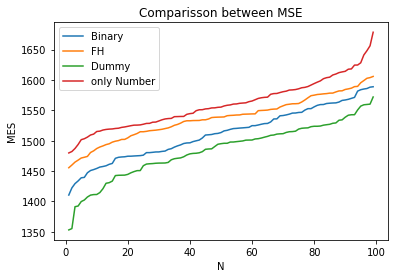

In [99]:
plt.plot(Binary_df)
plt.plot(Feature_Hashing_df)
plt.plot(NC_df)
plt.plot(N_df)

plt.title('Comparisson between MSE')
plt.ylabel('MES')
plt.xlabel('N')

plt.legend(["Binary", "FH","Dummy","only Number"])

plt.show()